# SQL Weekend Project
- [Requirements](https://docs.google.com/document/d/1_p0GndxoUw0MqNsIEiNVNNy-pBsaYiMPHDqwPznMZ_k/edit?usp=sharing)

### Start up BlazingSQL 

In [2]:
from blazingsql import BlazingContext

bc = BlazingContext()

BlazingContext ready


### Connect to S3 bucket

In [3]:
bc.s3('blazingsql-colab', bucket_name='blazingsql-colab')

(True,
 '',
 OrderedDict([('type', 's3'),
              ('bucket_name', 'blazingsql-colab'),
              ('access_key_id', ''),
              ('secret_key', ''),
              ('session_token', ''),
              ('encryption_type', <S3EncryptionType.NONE: 1>),
              ('kms_key_amazon_resource_name', ''),
              ('endpoint_override', ''),
              ('region', '')]))

### Create Table from S3

In [4]:
bc.create_table('taxi', 's3://blazingsql-colab/yellow_taxi/taxi_data.parquet')
bc.create_table('taxi_a', 's3://blazingsql-colab/yellow_taxi/taxi_data.parquet', header=0)

## Write 20+ Queries


### 1. Count total columns 

In [5]:
query = '''
        SELECT COUNT(*) AS Total
        FROM  taxi
        '''
bc.sql(query)

,Total
0,1000000


### 2. Show all columns for 3 rows 

In [6]:
query = '''
        SELECT *
        FROM  taxi
        LIMIT 3
        '''
bc.sql(query)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2.0,2015-03-05 07:38:36,2015-03-05 07:44:06,1.0,1.10,-8235279.565,4975191.631,1.0,N,-8235303.346,4973620.602,1.0,6.0,0.0,0.5,2.00,0.0,8.80
1,1.0,2015-02-03 05:41:55,2015-02-03 05:46:54,1.0,0.70,-8235656.655,4972873.569,1.0,N,-8236483.024,4973822.361,1.0,5.5,0.5,0.5,1.36,0.0,8.16
2,2.0,2015-02-08 16:17:51,2015-02-08 16:37:45,1.0,3.65,-8238228.336,4974965.742,1.0,N,-8233503.678,4978004.758,2.0,16.0,0.0,0.5,0.00,0.0,16.80


### 3. Show any 3 columns from your choice

In [7]:
query = '''
        SELECT VendorID, passenger_count, trip_distance
        FROM  taxi
      
        '''
bc.sql(query)

,VendorID,passenger_count,trip_distance
0,2.0,1.0,1.10
1,1.0,1.0,0.70
2,2.0,1.0,3.65
3,2.0,3.0,0.77
4,2.0,2.0,0.74
...,...,...,...
999995,2.0,1.0,0.89
999996,2.0,1.0,1.62
999997,2.0,2.0,5.20
999998,2.0,1.0,1.91


### 4. Show vendor ID include trip distance and tip amount begin with 30+ 

In [8]:
#LIKE

query = '''
        SELECT VendorID, trip_distance, tip_amount
        FROM taxi
        WHERE tip_amount LIKE '30%'
        '''
bc.sql(query)

,VendorID,trip_distance,tip_amount
0,1.0,1.90,30.00
1,2.0,2.80,30.03
2,2.0,2.19,30.09
3,1.0,21.70,30.00
4,1.0,0.80,30.00
5,1.0,2.10,30.00
6,1.0,38.00,30.95
7,1.0,5.80,30.00
8,1.0,4.20,30.00
9,1.0,4.20,30.00


### 5. Show top 100  The time-and-distance fare calculated by the meter, store_and_fwd_flag, count of total amount, and Payment type of Yellow Taxi Trip

In [9]:
query = '''
    SELECT 
        fare_amount, store_and_fwd_flag
        , COUNT(total_amount) AS count_of_total_amount ,
        Payment_type

    FROM taxi
    GROUP BY 
        fare_amount,
        store_and_fwd_flag,
        Payment_type

    HAVING 
        Payment_type = 1

    ORDER BY 
        fare_amount DESC

    LIMIT 100

        '''
bc.sql(query)

,fare_amount,store_and_fwd_flag,count_of_total_amount,Payment_type
0,990.00,N,1,1.0
1,900.00,N,1,1.0
2,400.00,N,1,1.0
3,375.00,N,1,1.0
4,350.00,N,1,1.0
...,...,...,...,...
95,60.50,N,2,1.0
96,60.00,N,89,1.0
97,60.00,Y,1,1.0
98,59.75,N,2,1.0


### 6. Use CEILING function to Returns the smallest integer value that is larger than or equal to a tolls_amount on Yellow Taxi Trip Records. 

In [10]:
#CEILING tolls_amount
query = '''
    SELECT  
        VendorID, CEILING(tolls_amount) AS Cellicing_tolls_amount , tolls_amount 
    FROM 
        taxi
    WHERE
        tolls_amount<>0
        ORDER BY Cellicing_tolls_amount DESC

    LIMIT 50

        '''
bc.sql(query)

,VendorID,Cellicing_tolls_amount,tolls_amount
0,1.0,96.0,95.50
1,1.0,90.0,89.75
2,1.0,86.0,85.33
3,1.0,86.0,85.54
4,1.0,71.0,70.50
5,1.0,66.0,66.00
6,1.0,62.0,61.96
7,1.0,54.0,53.33
8,1.0,45.0,44.44
9,1.0,45.0,44.13


### 7. Show date and time when the meter engaged, the final rate code in effect at the end of the trip for the negotiated fare and group rides, and a maximum of tip amount per passenger of Yellow Taxi Trip  Records.

In [11]:
#Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

#passenger_count The number of passengers in the vehicle. 

query = '''
    SELECT 
        tpep_pickup_datetime,
        RateCodeID,
        MAX(tip_amount / passenger_count) AS MAX_tip_amount_per_passenger
    FROM 
        taxi
    WHERE 
        RateCodeID IN(5,6) 

    GROUP BY 
        tpep_pickup_datetime,
        RateCodeID
'''

bc.sql(query)

,tpep_pickup_datetime,RateCodeID,MAX_tip_amount_per_passenger
0,2015-03-09 13:10:42,5.0,58.00
1,2015-02-28 19:43:28,5.0,0.00
2,2015-03-27 17:33:40,5.0,4.00
3,2015-03-14 00:30:08,5.0,5.00
4,2015-02-27 23:34:10,5.0,0.00
...,...,...,...
1449,2015-03-21 02:51:52,5.0,1.65
1450,2015-02-26 01:01:03,5.0,0.00
1451,2015-01-01 01:18:59,5.0,0.00
1452,2015-02-17 20:41:47,5.0,0.00


### 8. Find the elapsed trip distance in miles that was reported by the taximeter and average of the total amount of all tolls paid in the trip on the February of 2015 of yellow taxi trip Records.

In [12]:
#extract month
query = '''
        select
            MONTH(tpep_pickup_datetime) AS month_tpep_pickup , trip_distance, AVG(total_amount) AS avg_total_amount
        from
            taxi
        where
            tpep_pickup_datetime LIKE '%-02-%'
            AND pickup_Y LIKE '4975631%'
        GROUP BY trip_distance, MONTH(tpep_pickup_datetime)
        '''
bc.sql(query)

,month_tpep_pickup,trip_distance,avg_total_amount
0,2,2.60,12.80
1,2,1.40,7.30
2,2,2.85,13.50
3,2,1.17,9.36
4,2,5.29,26.16
5,2,5.08,20.80
6,2,3.60,13.80
7,2,5.50,19.30
8,2,2.13,16.30
9,2,1.55,10.80


### 9. Find the code that indicates the TPEP provider that provided the record, year when the meter was disengaged and the number of passengers in the vehicle of yellow taxi trip tecords.

In [13]:
#DISTINCT VendorID, Extract year
query = '''
        SELECT
            COUNT(DISTINCT VendorID) AS Unique_VendorID,
            YEAR(tpep_dropoff_datetime) AS years,
            SUM(passenger_count) AS passenger_count
        FROM 
            taxi
        WHERE 
            passenger_count <>0
        GROUP BY 
            tpep_dropoff_datetime
        '''

bc.sql(query)

,Unique_VendorID,years,passenger_count
0,1,2015,1.0
1,1,2015,1.0
2,1,2015,1.0
3,1,2015,1.0
4,1,2015,1.0
...,...,...,...
924113,1,2015,2.0
924114,1,2015,2.0
924115,1,2015,1.0
924116,1,2015,2.0


### 10. Join two tables with Left Join type to find the time-and-distance fare calculated by the meter, the total amount charged to passengers, and to know whether the trip record was held in the vehicle memory before sending to the vendor of yellow taxi trip records..

#### The two tables were joined with Vendor ID and pickup datetime.

In [14]:
#INNER join

query = '''
        select 
            taxi.fare_amount, 
            taxi_a.RateCodeID, 
            taxi_a.total_amount,
            taxi.store_and_fwd_flag
        from 
            taxi
            
        INNER JOIN 
            taxi_a 
            ON taxi_a.VendorID = taxi.VendorID AND taxi_a.tpep_pickup_datetime = taxi.tpep_pickup_datetime
        '''
bc.sql(query)

,fare_amount,RateCodeID,total_amount,store_and_fwd_flag
0,15.0,1.0,20.16,N
1,12.0,1.0,16.62,N
2,5.5,1.0,6.30,N
3,11.5,1.0,13.30,N
4,5.0,1.0,7.80,N
...,...,...,...,...
1079311,7.5,1.0,9.30,N
1079312,6.0,1.0,7.80,N
1079313,5.0,1.0,6.30,N
1079314,22.5,1.0,27.96,N


### 11. Use ROUND function rounds fare_amount to a specified number of decimal places and change payment type as int the average of miscellaneous extras and surcharges, minimum trip distance, and cost of each trip of yellow taxi trip records for first 500 row and VendorID who starts with 1

In [15]:
query = '''
select VendorID, RateCodeID, CAST(payment_type AS int) payment_type_as_int , ROUND(fare_amount,1) AS round_fare_amount
from taxi
WHERE VendorID LIKE '1%'
LIMIT 500
'''
bc.sql(query)

,VendorID,RateCodeID,payment_type_as_int,round_fare_amount
0,1.0,1.0,1,5.5
1,1.0,1.0,1,10.0
2,1.0,1.0,1,10.5
3,1.0,1.0,2,3.5
4,1.0,1.0,1,6.0
...,...,...,...,...
495,1.0,1.0,1,10.5
496,1.0,1.0,2,9.0
497,1.0,1.0,2,6.0
498,1.0,1.0,2,20.0


### 12. Check when the tip amount increases, will the trip distance increase

In [16]:
query = '''
SELECT vendorID,trip_distance, extra,tip_amount, total_amount
FROM taxi
WHERE tip_amount > 0.0 AND extra > 0.0
ORDER BY extra
        '''
bc.sql(query)

,vendorID,trip_distance,extra,tip_amount,total_amount
0,1.0,4.7,0.01,2.00,0.30
1,1.0,5.1,0.01,1.00,0.30
2,1.0,4.1,0.01,3.36,0.30
3,1.0,2.0,0.01,1.00,0.30
4,1.0,0.7,0.50,1.36,8.16
...,...,...,...,...,...
299831,1.0,1.1,1.50,1.00,0.30
299832,1.0,0.3,1.50,1.32,6.62
299833,1.0,2.6,1.50,3.66,21.96
299834,1.0,3.5,2.00,4.30,26.10


### 13. Ckeck if the total amounts paid by the passengers other than the fare amount for first hundred row where passenger_count not equal 0.0

In [17]:
query = '''
SELECT vendorID, passenger_count, total_amount, (total_amount - fare_amount) AS Amount_without_Fare
FROM taxi
WHERE passenger_count <> 0.0
ORDER BY Amount_without_Fare
LIMIT 100
        
        '''
bc.sql(query)

,vendorID,passenger_count,total_amount,Amount_without_Fare
0,2.0,1.0,0.3,-159.7
1,2.0,1.0,0.3,-149.7
2,1.0,1.0,0.3,-137.7
3,1.0,4.0,0.3,-122.7
4,1.0,1.0,0.3,-119.7
...,...,...,...,...
95,2.0,1.0,0.3,-59.7
96,2.0,2.0,0.3,-59.7
97,1.0,1.0,0.3,-59.7
98,2.0,1.0,0.3,-59.7


### 14. Marge latitude and longitude for x or y in same column to make it easier to detect location for a certain number of passengers

In [18]:
query = '''
SELECT passenger_count, pickup_x || ', ' || pickup_y AS pickup_xy , dropoff_x || ',' || dropoff_y AS dropoff_xy, RateCodeID
FROM taxi
WHERE passenger_count BETWEEN 2.0 AND 5.0
ORDER BY RateCodeID

        '''
bc.sql(query)

,passenger_count,pickup_xy,dropoff_xy,RateCodeID
0,3.0,"-8232200.852, 4980818.134","-8231245.389,4980848.42",1.0
1,2.0,"-8236124.619, 4973741.097","-8234966.173,4972970.518",1.0
2,5.0,"-8238354.032, 4975721.343","-8236185.769,4976682.745",1.0
3,5.0,"-8233618.334, 4977926.822","-8234368.266,4977621.255",1.0
4,2.0,"-8237552.293, 4971697.934","-8236852.469,4976189.98",1.0
...,...,...,...,...
255035,2.0,"-8231844.145, 4980238.233","-8236177.276,4972344.012",99.0
255036,3.0,"-8236635.049, 4971744.441","-8236409.135,4974287.544",99.0
255037,2.0,"-8234169.53, 4976446.17","-8235198.032,4974848.035",99.0
255038,2.0,"-8235705.914, 4978723.586","-8236691.952,4970773.44",99.0


### 15. Apply ABS to make total amount positive number

In [19]:
query = '''
select VendorID, passenger_count, ABS(total_amount) AS abs_dropoff
from taxi
'''
bc.sql(query)

,VendorID,passenger_count,abs_dropoff
0,2.0,1.0,8.80
1,1.0,1.0,8.16
2,2.0,1.0,16.80
3,2.0,3.0,6.80
4,2.0,2.0,7.80
...,...,...,...
999995,2.0,1.0,6.30
999996,2.0,1.0,0.30
999997,2.0,2.0,26.62
999998,2.0,1.0,0.30


### 16. Find how much will be the amount total if passengers not given drivers tip

In [20]:
query = '''
SELECT VendorID, tip_amount, total_amount, (total_amount - tip_amount) AS total_amount_without_tip 
FROM (
SELECT VendorID, tip_amount, total_amount FROM taxi WHERE VendorID = 1.0)
LIMIT 100
'''
bc.sql(query)

,VendorID,tip_amount,total_amount,total_amount_without_tip
0,1.0,1.36,8.16,6.80
1,1.0,2.10,0.00,-2.10
2,1.0,3.35,14.65,11.30
3,1.0,0.00,0.00,0.00
4,1.0,2.15,9.45,7.30
...,...,...,...,...
95,1.0,3.75,0.30,-3.45
96,1.0,1.95,9.75,7.80
97,1.0,2.05,0.00,-2.05
98,1.0,0.00,0.30,0.30


### 17. Show mta_tax as natural logarithm, and retrun the difference in minutes between tpep_dropoff_datetime and tpep_pickup_datetime

In [21]:
query = '''
SELECT passenger_count,EXTRACT(MINUTE FROM tpep_pickup_datetime) AS minute_pickup, 
EXTRACT(MINUTE FROM tpep_dropoff_datetime) AS minute_drop, LN(mta_tax) AS mta_tax_natural, (EXTRACT(MINUTE FROM tpep_dropoff_datetime) - EXTRACT(MINUTE FROM tpep_pickup_datetime)) AS difference_dropoff_pickup
FROM taxi
LIMIT 5
'''
bc.sql(query)

,passenger_count,minute_pickup,minute_drop,mta_tax_natural,difference_dropoff_pickup
0,1.0,38,44,-0.693147,6
1,1.0,41,46,-0.693147,5
2,1.0,17,37,-0.693147,20
3,3.0,17,22,-0.693147,5
4,2.0,5,10,-0.693147,5


### 18. Change data type for 1 column

In [22]:
#CAST, I have changed the data type from float to int of passenger count column. 
query = '''
        SELECT passenger_count AS P_Before ,
        CAST(passenger_count AS int) AS P_After 
        FROM taxi 
        
'''
bc.sql(query)

,P_Before,P_After
0,1.0,1
1,1.0,1
2,1.0,1
3,3.0,3
4,2.0,2
...,...,...
999995,1.0,1
999996,1.0,1
999997,2.0,2
999998,1.0,1


### 19. Show vendor ID and total amount of cash payment  

In [23]:
#Nested qouery       


query = '''
        SELECT VendorID, total_amount, payment_type
        FROM taxi 
        WHERE payment_type IN (SELECT payment_type 
                                 FROM taxi 
                                 WHERE payment_type = 2
                                 )
        
        '''
    

bc.sql(query)

,VendorID,total_amount,payment_type
0,1.0,0.3,2.0
1,2.0,0.3,2.0
2,2.0,11.8,2.0
3,1.0,6.8,2.0
4,1.0,9.3,2.0
...,...,...,...
366594,2.0,9.3,2.0
366595,2.0,18.3,2.0
366596,1.0,0.3,2.0
366597,1.0,0.3,2.0


### 20. Show NULL values in your table

In [24]:
#NULL Values 


#I have tried many columns seems there is no NULL values in taxi data!
#Vice versa that when I tried (passenger_count IS NOT NULL) that shows all data values
#So, I thnik the query is correct but there isn't NULL values.
    
query = '''
        SELECT *
        FROM taxi
        WHERE VendorID IS NULL

        '''

bc.sql(query)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount


### 21. Show Vendor ID and payment type

In [25]:
#GROUP BY, OREDER BY DESC

query = '''
        SELECT VendorID, payment_type 
        FROM taxi
        GROUP BY VendorID, payment_type 
        ORDER BY payment_type DESC
        '''

bc.sql(query)

,VendorID,payment_type
0,1.0,4.0
1,2.0,4.0
2,1.0,3.0
3,2.0,3.0
4,1.0,2.0
5,2.0,2.0
6,1.0,1.0
7,2.0,1.0


### 22. Apply MAX, MIN, AVG of total amounts

In [26]:
# Shows MAX, MIN, and AVERAGE of total amounts
query = '''
        SELECT MAX(total_amount) AS max_total, 
               AVG(total_amount) AS avg_total,
               MIN(total_amount) AS min_total
               

        
        FROM taxi
        WHERE passenger_count <> 2 AND trip_distance > 5
        '''

bc.sql(query)

,max_total,avg_total,min_total
0,180.82,26.674266,0.0


### 24. Sort ascending the highest tip amount greater than 100

In [27]:
#Floor 
query = '''
        SELECT FLOOR(tip_amount) AS Highest_tips
        FROM taxi
        WHERE tip_amount >= 100
        ORDER BY tip_amount ASC
        '''
bc.sql(query)

,Highest_tips
0,100.0
1,100.0
2,100.0
3,100.0
4,111.0
5,139.0
6,160.0
7,180.0
8,333.0
9,350.0


### 25. Choose 5 columns and join it on pick up date time and drop off

In [28]:
# LEFT JOIN
query = '''
        SELECT  taxi.VendorID, 
                taxi_a.passenger_count, 
                taxi_a.trip_distance,
                taxi_a.tip_amount,
                taxi_a.total_amount
        FROM taxi 
        LEFT JOIN taxi_a 
        ON taxi_a.tpep_pickup_datetime = taxi.tpep_pickup_datetime 
        AND taxi_a.tpep_dropoff_datetime = taxi.tpep_dropoff_datetime
        
        '''

bc.sql(query)

,VendorID,passenger_count,trip_distance,tip_amount,total_amount
0,2.0,1.0,1.24,1.76,10.56
1,2.0,1.0,2.55,1.00,11.30
2,1.0,1.0,3.30,4.06,24.36
3,2.0,1.0,5.90,4.00,27.80
4,1.0,1.0,0.60,1.00,6.80
...,...,...,...,...,...
1000139,2.0,1.0,9.16,10.14,43.94
1000140,1.0,1.0,7.00,5.05,30.35
1000141,2.0,5.0,2.37,0.00,12.30
1000142,2.0,1.0,1.25,0.00,8.80


### 26. Show passenger_coun who had paymamt type dispute

In [29]:
query = '''
            SELECT VendorID ,
            passenger_count,
            trip_distance
            
            FROM
                taxi
            where
            payment_type=4
                     
        '''
bc.sql(query)

,VendorID,passenger_count,trip_distance
0,1.0,2.0,2.60
1,1.0,1.0,0.00
2,2.0,3.0,0.65
3,1.0,1.0,59.30
4,1.0,2.0,10.10
...,...,...,...
897,1.0,2.0,2.70
898,1.0,1.0,0.20
899,1.0,3.0,4.10
900,1.0,1.0,0.60


### 27. Show SHORTESRT_TRIP and passenger_coun who   is greater than 2

In [30]:
 query = '''   SELECT
        CEILING(trip_distance) AS SHORTESRT_TRIP ,
        
         passenger_count
    
    FROM
        taxi
    WHERE
        passenger_count > 2
    
        
        '''
bc.sql(query)

,SHORTESRT_TRIP,passenger_count
0,1.0,3.0
1,2.0,5.0
2,1.0,5.0
3,4.0,5.0
4,1.0,3.0
...,...,...
151532,2.0,4.0
151533,3.0,3.0
151534,3.0,3.0
151535,2.0,5.0


### 28. Show TIMESTAMP WHER VendorID is 2 ->VeriFone Inc

In [31]:
query = '''
    SELECT
        CAST((tpep_pickup_datetime ) AS TIMESTAMP ) AS tpep_pickup_datetime , 
        VendorID
    FROM
        taxi
        WHERE 
        VendorID=2

        '''
bc.sql(query)

,tpep_pickup_datetime,VendorID
0,2015-03-05 07:38:36,2.0
1,2015-02-08 16:17:51,2.0
2,2015-03-07 02:17:05,2.0
3,2015-02-05 21:05:35,2.0
4,2015-01-27 18:32:32,2.0
...,...,...
526740,2015-02-23 22:14:26,2.0
526741,2015-01-22 03:46:03,2.0
526742,2015-02-05 16:19:05,2.0
526743,2015-01-27 18:29:36,2.0


### 29. Show WHEN fare_amount IS GREETER THAN total_amount !

In [32]:
query = '''

SELECT ( fare_amount >total_amount) AS LOSE

    
    FROM
        taxi
 

    
        
        '''
bc.sql(query)


,LOSE
0,False
1,False
2,False
3,False
4,False
...,...
999995,False
999996,True
999997,False
999998,True


### 30. Show VendorID ,passenger_count,trip_distance WHERE THE  passenger_count= 6!

In [33]:
query = '''
            SELECT VendorID ,
            passenger_count,
            trip_distance
            
            FROM
                taxi
            where
                passenger_count=6
                     
        '''
bc.sql(query)

,VendorID,passenger_count,trip_distance
0,2.0,6.0,2.50
1,2.0,6.0,1.56
2,2.0,6.0,0.37
3,2.0,6.0,0.61
4,2.0,6.0,1.66
...,...,...,...
35891,2.0,6.0,1.37
35892,2.0,6.0,1.06
35893,2.0,6.0,3.06
35894,2.0,6.0,1.30


### 31. Show MAXIMUM_distancer,  AVG_distance , MIN_distance  WHERE THE  passenger_count= 6!

In [34]:
query = '''
            SELECT  MAX (trip_distance) AS MAXIMUM_distance,
                    AVG (trip_distance) AS AVG_distance,
                    MIN (trip_distance) AS MIN_distance
            
            
            FROM
                taxi
            where
                passenger_count=6
                     
        '''
bc.sql(query)

,MAXIMUM_distance,AVG_distance,MIN_distance
0,34.97,2.194068,0.0


### 32. Show  passenger_count WHERE THE  passenger_count= 2!

In [35]:
query = '''
            SELECT  passenger_count
            
            
            FROM
                taxi
            where
                passenger_count=2
                     
        '''
bc.sql(query)

,passenger_count
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
139395,2.0
139396,2.0
139397,2.0
139398,2.0


### 33. Show VendorID,  passenger_count,  trip_distance WHERE THE  passenger_count= 1 AND trip_distance < 0.1 TO defind lazy pepole!

In [36]:
query = '''
            SELECT  VendorID,
            passenger_count ,
            trip_distance
            
            
            FROM
                taxi
            where
                passenger_count=1 and trip_distance < 0.1
            ORDER BY
                VendorID
                     
        '''
bc.sql(query)

,VendorID,passenger_count,trip_distance
0,1.0,1.0,0.00
1,1.0,1.0,0.00
2,1.0,1.0,0.00
3,1.0,1.0,0.00
4,1.0,1.0,0.00
...,...,...,...
3281,2.0,1.0,0.00
3282,2.0,1.0,0.00
3283,2.0,1.0,0.06
3284,2.0,1.0,0.00


### 34. Show MAXIMUM_fare,  AVG_fare , MIN_fare  WHERE THE  passenger_count is not  1 and trip distance greater than 3!

In [37]:
query = '''
        SELECT
        MAX(fare_amount) AS maximum_fare, 
        AVG(fare_amount) AS avareg_fare,
       MIN(fare_amount) AS minimum_fare

        
        FROM taxi
       
        WHERE passenger_count <> 1  AND trip_distance > 2
        '''
bc.sql(query)

,maximum_fare,avareg_fare,minimum_fare
0,400.0,16.139174,0.0


### 35. Show traveler throug DAY 1 OF YEAR

In [38]:
query = '''
        
        SELECT 
        Years , Months ,DAYS
         FROM


    (Select 
        YEAR(tpep_pickup_datetime) As Years
        ,MONTH(tpep_pickup_datetime) As Months
        ,DAYOFMONTH(tpep_pickup_datetime) As DAYS
      

       
        
        FROM 
        taxi

) AS INNERTABLE
WHERE 
    DAYS =1 AND Months =1

 
        '''
bc.sql(query)

,Years,Months,DAYS
0,2015,1,1
1,2015,1,1
2,2015,1,1
3,2015,1,1
4,2015,1,1
...,...,...,...
11839,2015,1,1
11840,2015,1,1
11841,2015,1,1
11842,2015,1,1


### 36. Show work  Years , Months ,DAYS 


In [39]:
query = '''
        
        SELECT DISTINCT 
        Years , Months ,DAYS
         FROM


    (Select 
        YEAR(tpep_pickup_datetime) As Years
        ,MONTH(tpep_pickup_datetime) As Months
        ,DAYOFMONTH(tpep_pickup_datetime) As DAYS
      

       
        
        FROM 
        taxi

) AS INNERTABLE
 

 
        '''
bc.sql(query)

,Years,Months,DAYS
0,2015,1,1
1,2015,1,2
2,2015,1,3
3,2015,1,4
4,2015,1,5
...,...,...,...
85,2015,3,27
86,2015,3,28
87,2015,3,29
88,2015,3,30


### 37. Show The total number of rides

In [40]:
query = '''
    SELECT 
        passenger_count ,SUM(passenger_count) AS TOTAL_NUMBER
    FROM 
        taxi
    GROUP BY
        passenger_count
        
   
     
    

        '''
bc.sql(query)

,passenger_count,TOTAL_NUMBER
0,6.0,215376.0
1,4.0,76604.0
2,0.0,0.0
3,3.0,122058.0
4,1.0,708453.0
5,5.0,279015.0
6,2.0,278800.0
7,7.0,7.0


### 38. Show the average cost per trip by number of passengers

In [41]:
query = '''
    SELECT  
         passenger_count
        ,AVG(total_amount) as avg_cost
    FROM
        taxi
    Group by 
        passenger_count


        '''
bc.sql(query)

,passenger_count,avg_cost
0,6.0,8.806186
1,4.0,8.769629
2,0.0,9.746590
3,3.0,8.823068
4,1.0,8.863384
5,5.0,8.982179
6,2.0,9.004074
7,7.0,11.750000


### 38. Show the average , MINMUM AND MAXIMUM number of passengers  per YEARS , group by  year

In [42]:
query = '''
    SELECT 
        MAX(passenger_count) as MAX_passenger,
         MIN(passenger_count) as MIN_passenger,
          AVG(passenger_count) as avg_passenger
        ,  YEAR(tpep_pickup_datetime) AS YEARS
    FROM 
        taxi
    group by
         YEAR(tpep_pickup_datetime)

        '''
bc.sql(query)

,MAX_passenger,MIN_passenger,avg_passenger,YEARS
0,7.0,0.0,1.680313,2015


### 39. Show DAYS , the average number of passengers   , total_amount group per DAY

In [43]:
query = '''
     SELECT 
        DAYOFMONTH(tpep_pickup_datetime) AS DAYS
       , AVG(passenger_count) as avg_passenger
       ,total_amount
        
    FROM 
        taxi
    group by
        tpep_pickup_datetime , total_amount


        '''
bc.sql(query)

,DAYS,avg_passenger,total_amount
0,10,1.0,41.55
1,21,1.0,18.80
2,4,1.0,9.30
3,20,1.0,0.30
4,5,1.0,6.80
...,...,...,...
971964,16,2.0,0.30
971965,10,1.0,0.30
971966,24,1.0,22.56
971967,16,1.0,0.30


### 40. Show the largest integer value that is smaller than or equal to a numbe

In [44]:
query = '''
     SELECT  
     FLOOR(passenger_count) as Floor_passenger_count ,
     CEILING(passenger_count) as celling_passenger_count ,
     ROUND(passenger_count) as Round_passenger_count
         
        
    FROM 
        taxi
        
  

        '''
bc.sql(query)

,Floor_passenger_count,celling_passenger_count,Round_passenger_count
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,3.0,3.0,3.0
4,2.0,2.0,2.0
...,...,...,...
999995,1.0,1.0,1.0
999996,1.0,1.0,1.0
999997,2.0,2.0,2.0
999998,1.0,1.0,1.0


### 41. Find largest integer value that is smaller than or equal to a numbe

In [45]:
 
query = '''
     SELECT DISTINCT
     FLOOR(total_amount) as Floor_total_amount ,
     CEILING(total_amount) as celling_total_amount ,
     ROUND(total_amount) as Round_total_amount
         
        
    FROM 
        taxi
        
 


        '''
bc.sql(query)

,Floor_total_amount,celling_total_amount,Round_total_amount
0,-112.0,-111.0,-111.0
1,-59.0,-58.0,-58.0
2,-57.0,-56.0,-57.0
3,-53.0,-52.0,-53.0
4,-51.0,-50.0,-50.0
...,...,...,...
356,420.0,421.0,420.0
357,750.0,751.0,750.0
358,900.0,901.0,900.0
359,990.0,991.0,990.0


## Visualize 3+ Queries

### 1. Find the final rate code in effect at the end of the trip, the average of miscellaneous extras and surcharges, minimum trip distance, and cost of each trip of yellow taxi trip records.


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

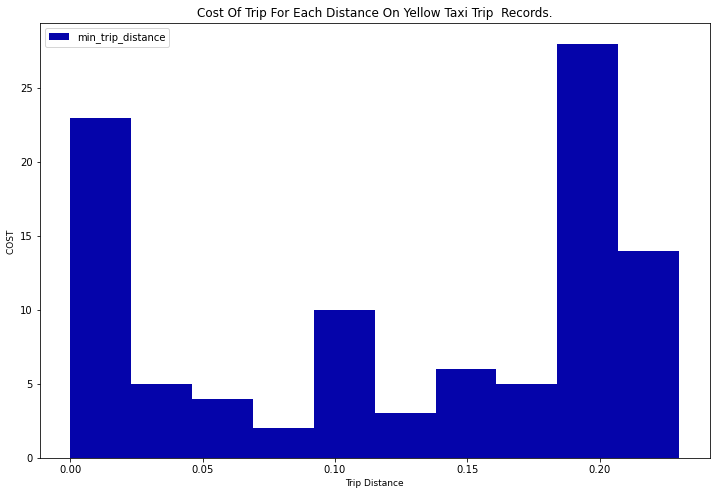

In [47]:
#Nested Query 
query = '''
SELECT RateCodeID, avg(Extra) avg_extra, min(trip_distance) AS min_trip_distance, COST 
FROM
(SELECT *, 
total_amount - tip_amount AS  COST
    FROM TAXI
    
    WHERE passenger_count <> 1000
    )
    WHERE RateCodeID BETWEEN 1 AND 2 AND DAYOFMONTH(tpep_pickup_datetime) = 31
    GROUP BY RateCodeID, trip_distance, COST
    order by trip_distance ASC
    LIMIT 100
    

'''
bc.sql(query).to_pandas().plot(kind='hist', x='COST', y='min_trip_distance', color='#0504aa',title="Cost Of Trip For Each Distance On Yellow Taxi Trip  Records.", ylabel='min_trip_distance', figsize=[12,8]);
plt.ylabel('COST ',fontsize=9);
plt.xlabel('Trip Distance',fontsize=9);


### 2. Display the difference between fare amount and total amount for first 50 rows

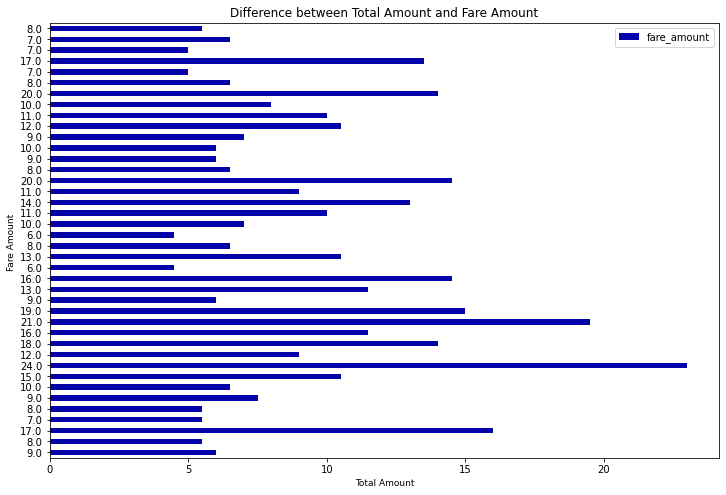

In [48]:
query = '''
SELECT 
    fare_amount, 
    ROUND(total_amount) AS total_amount
FROM 
    taxi
WHERE 
    ROUND(total_amount) >0.0
LIMIT 40
'''
bc.sql(query).to_pandas().plot(kind='barh', x='total_amount', y='fare_amount', color='#0504aa',title="Difference between Total Amount and Fare Amount", figsize=[12,8]);
plt.ylabel('Fare Amount ',fontsize=9);
plt.xlabel('Total Amount',fontsize=9);


### 3. Show 3 columns where tip is greater than 200$ and don't forget the chart

,VendorID,trip_distance,tip_amount
0,2.0,3.07,333.6
1,2.0,0.00,350.0
2,2.0,0.00,495.0


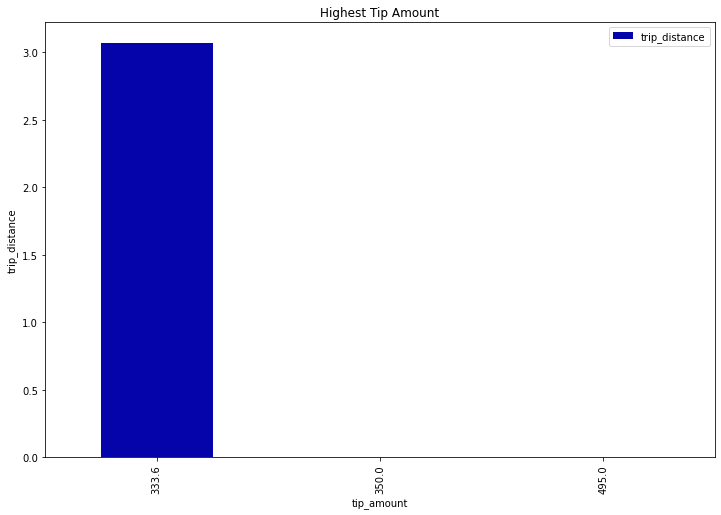

In [49]:
# We use WHERE, OREDER BY, Plot
query = '''
        SELECT VendorID, trip_distance, tip_amount
        FROM taxi
        WHERE tip_amount > 200
        ORDER BY tip_amount ASC
        '''

bc.sql(query).to_pandas().plot(kind='bar', x='tip_amount', y='trip_distance', color='#0504aa',title="Highest Tip Amount", ylabel='trip_distance', figsize=[12,8])
bc.sql(query)

### 4. Show most used of payment type

### Create New Tables from the Files You just Wrote

,payment_type
0,4.0
1,3.0
2,2.0
3,1.0


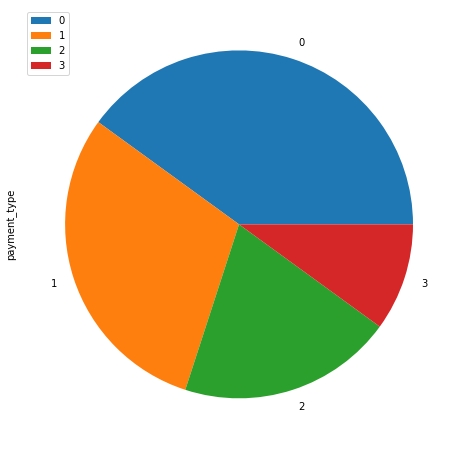

In [60]:
# GROUP BY, OREDER BY, Pie
query = '''
         SELECT DISTINCT payment_type 
        FROM taxi
        GROUP BY VendorID, payment_type 
        ORDER BY payment_type DESC
        '''


bc.sql(query).to_pandas().plot(kind='pie',subplots=True, figsize=[12,8])
bc.sql(query)